In [1]:
!git clone https://github.com/atikul-islam-sajib/GPWGAN.git

Cloning into 'GPWGAN'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 165 (delta 4), reused 19 (delta 2), pack-reused 140
Receiving objects: 100% (165/165), 301.35 MiB | 22.49 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [2]:
# Change the directory
%cd /content/GPWGAN

/content/GPWGAN


#Train the model using command line

In [3]:
#Check the command line interface
!python /content/GPWGAN/src/cli.py --help

usage: cli.py [-h] [--batch_size BATCH_SIZE] [--download_mnist] [--epochs EPOCHS]
              [--latent_space LATENT_SPACE] [--lr LR] [--samples SAMPLES] [--test]
              [--device DEVICE] [--critic_steps CRITIC_STEPS] [--display DISPLAY]

Command Line Coding

options:
  -h, --help            show this help message and exit
  --batch_size BATCH_SIZE
                        Batch size for the dataloader
  --download_mnist      Download mnist dataset
  --epochs EPOCHS       Number of epochs
  --latent_space LATENT_SPACE
                        Latent size
  --lr LR               Learning rate
  --samples SAMPLES     Number of samples to generate
  --test                Run synthetic data tests
  --device DEVICE       Device defined
  --critic_steps CRITIC_STEPS
                        Critic steps
  --display DISPLAY     Display steps of each training


In [4]:
# Connect the GPU
import torch

device = torch.device("cuda" if torch.cuda.is_available else "cpu")

print(device)

cuda


In [5]:
# Train the model - WGAN
!python /content/GPWGAN/src/cli.py --download_mnist --batch_size 128 --epochs 100 --latent_space 100 --lr 0.00005 --critic_steps 5 --device cuda --display True

Epoch [1/100] Completed
Average Critic Loss: -0.1536,            Average Generator Loss: -0.1906
Epoch [2/100] Completed
Average Critic Loss: -0.3672,            Average Generator Loss: 0.1915
Epoch [3/100] Completed
Average Critic Loss: -0.7278,            Average Generator Loss: -0.0448
Epoch [4/100] Completed
Average Critic Loss: -0.5896,            Average Generator Loss: -0.0931
Epoch [5/100] Completed
Average Critic Loss: -0.3005,            Average Generator Loss: -0.3601
Epoch [6/100] Completed
Average Critic Loss: -0.5017,            Average Generator Loss: 0.0103
Epoch [7/100] Completed
Average Critic Loss: -0.7054,            Average Generator Loss: 0.0502
Epoch [8/100] Completed
Average Critic Loss: -0.7346,            Average Generator Loss: 0.0382
Epoch [9/100] Completed
Average Critic Loss: -0.7341,            Average Generator Loss: -0.0039
Epoch [10/100] Completed
Average Critic Loss: -0.7329,            Average Generator Loss: -0.0358
Epoch [11/100] Completed
Average 

In [8]:
# Test the model performance
!python /content/GPWGAN/src/cli.py --samples 10 --latent_space 100

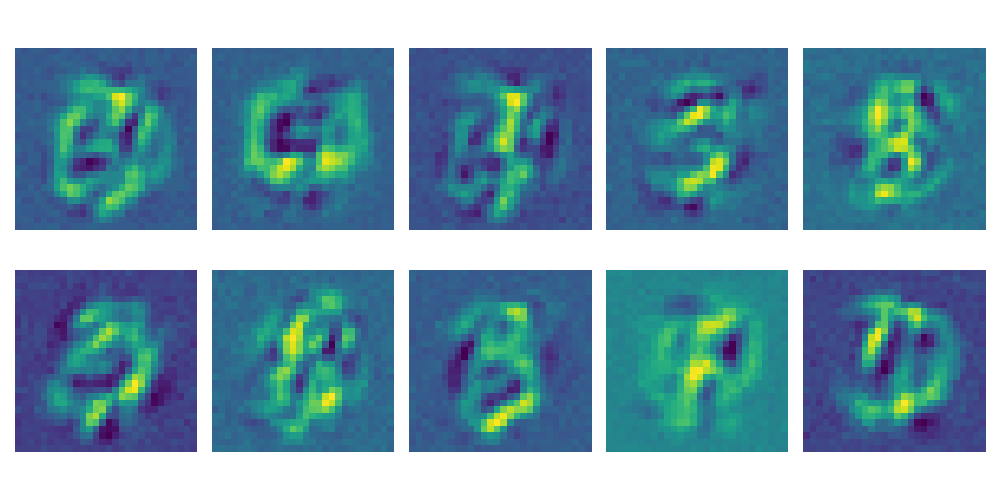

In [9]:
# Display the Image
from IPython.display import Image
Image("/content/GPWGAN/outputs/synthetic_image.png")

# Train the WGAN with importing the modules

In [12]:
from src.data_loader import Loader
from src.trainer import Trainer
from src.test import Test

In [13]:
# Initialize the data loader with batch size
loader = Loader(batch_size = 64)
loader.create_loader(mnist_data = loader.download_mnist())

In [18]:
# Set up the trainer with learning rate, epochs, and latent space size
trainer = Trainer(
    latent_space = 100,
    epochs = 20,
    lr = 0.00005,
    device = 'cuda',
    n_critic_step = 5,
    )

# Traun the WGAN
trainer.train_WGAN()

Epoch [1/20] Completed
Average Critic Loss: -0.3062,            Average Generator Loss: 0.0245
Epoch [2/20] Completed
Average Critic Loss: -0.6296,            Average Generator Loss: -0.1078
Epoch [3/20] Completed
Average Critic Loss: -0.3842,            Average Generator Loss: -0.1862
Epoch [4/20] Completed
Average Critic Loss: -0.6880,            Average Generator Loss: 0.0128
Epoch [5/20] Completed
Average Critic Loss: -0.7160,            Average Generator Loss: 0.0013
Epoch [6/20] Completed
Average Critic Loss: -0.6328,            Average Generator Loss: -0.0578
Epoch [7/20] Completed
Average Critic Loss: -0.4608,            Average Generator Loss: -0.0717
Epoch [8/20] Completed
Average Critic Loss: -0.3885,            Average Generator Loss: -0.0522
Epoch [9/20] Completed
Average Critic Loss: -0.3902,            Average Generator Loss: -0.0220
Epoch [10/20] Completed
Average Critic Loss: -0.4104,            Average Generator Loss: -0.0901
Epoch [11/20] Completed
Average Critic Los

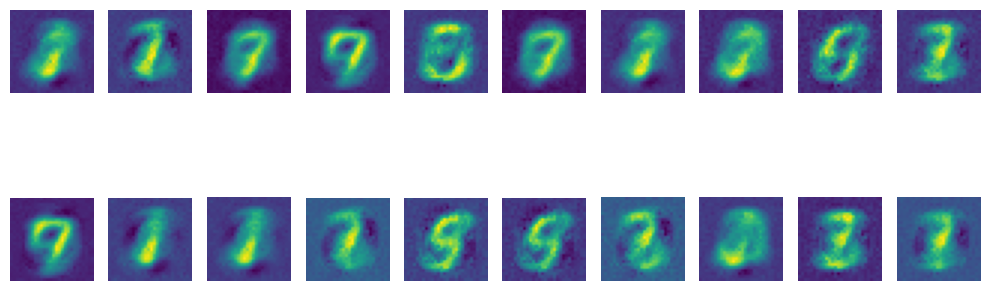

In [19]:
# Test the generated dataset and display the synthetic images
test = Test(num_samples = 20,latent_space = 100)
test.plot_synthetic_image()